In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.dates as mdates
import pickle
sns.set_theme(style='ticks')

In [2]:
with open('swap_dict.p', 'rb') as fp:
    swap_dict = pickle.load(fp)

In [3]:
#load the dataset and calculate price
df = pd.read_csv('dataset/final_dataset.csv', parse_dates = ['Timestamp'])
df['Total_Price'] = round(df['Price'] * df['Swap_Value'], 4)

In [ ]:
Tmassimo=0
for  wallet in swap_dict:   
       
    for token in swap_dict[wallet]:  # transactions of the same address
    
        if Tmassimo < len(swap_dict[wallet]) :
            
            Tmassimo = len(swap_dict[wallet])
                       
        
        
        

In [5]:
Mmassimo=0

for  wallet in swap_dict:   
    acc = 0   
    for token in swap_dict[wallet]:  # transactions of the same address
        for swap in swap_dict[wallet][token]:
            acc+=swap[-2]
    if Mmassimo < acc :
        Mmassimo = acc
        

0 -> 2026.91
2026.91 -> 110249.24
110249.24 -> 1081010.94
1081010.94 -> 1089905.7199999995
1089905.7199999995 -> 7582815.860000008
7582815.860000008 -> 117050336.81000002
117050336.81000002 -> 161549279.87


In [ ]:

Smax=494 #largest number of swaps made by a single user
Tmax= Tmassimo #85 #largest number of tokens swapped by a single user
Mmax=Mmassimo #161549279.87 #largest number of money swapped by a single user


df_wc=pd.DataFrame(columns=['Wallet', 'sc', 'sdc', 'tc', 'tdc', 'mc', 'bmdc', 'tmdc'])
#for each wallet
for  wallet in swap_dict:   
    dfwallet=df[df['From']==wallet]#executed swaps
    #group the swaps that the wallet has made in each blockchain
    smartchainswap = len(dfwallet[ (dfwallet['To_Chain_ID_1'] == 'BNB CHAIN')])
    ethswap = len(dfwallet[(dfwallet['To_Chain_ID_1'] == 'Ethereum')])
    ftmswap = len(dfwallet[(dfwallet['To_Chain_ID_1'] == 'Fantom')])
    avaswap = len(dfwallet[(dfwallet['To_Chain_ID_1'] == 'Avalanche')])
    polyswap =len(dfwallet[(dfwallet['To_Chain_ID_1'] == 'Polygon')])
    swaps= len(df[df['From']==wallet])
    
    
    #take the number of distinct tokens he swapped
    Tj = len(set(df[df['From']==wallet]['Swap_Token_Symbol']))
    
    # sum up the volume in USD that traded in each Blockchain target 
    smartchainmoney = dfwallet[dfwallet['To_Chain_ID_1'] == 'BNB CHAIN']['Total_Price'].sum()
    ethmoney = dfwallet[dfwallet['To_Chain_ID_1'] == 'Ethereum']['Total_Price'].sum()
    ftmmoney = dfwallet[dfwallet['To_Chain_ID_1'] == 'Fantom']['Total_Price'].sum()
    avamoney = dfwallet[dfwallet['To_Chain_ID_1'] == 'Avalanche']['Total_Price'].sum()
    polymoney =dfwallet[dfwallet['To_Chain_ID_1'] == 'Polygon']['Total_Price'].sum()
    #total volume in USD swapped
    Mj= df[df['From']==wallet]['Total_Price'].sum()
    
    swapspertoken=[]
    moneypertoken=[]
    acc=0
    acc2=0
    
    #calculation of HH for sdc
    for token in swap_dict[wallet]:  # transactions made from the same address
        sumtoken=df[(df['From']==wallet) & (df['Swap_Token_Symbol']==token)]['Total_Price'].sum()
        moneypertoken.append(sumtoken)
        swapspertoken.append(len(swap_dict[wallet][token]))      
   
    sdc=1 - (1/(swaps*swaps))*((smartchainswap*smartchainswap)+(ethswap*ethswap)+(ftmswap*ftmswap)+(avaswap*avaswap)+(polyswap*polyswap))
    
    
    #calculate the HH for tdc
    
    for Slj in swapspertoken:
        acc= acc + (Slj*Slj)
    tdc =1 - (1/(swaps*swaps))*acc
    
    # calculate bmdc
    if Mj ==0 : print(wallet)
    bmdc =1 - (1/(Mj*Mj))*((smartchainmoney*smartchainmoney)+(ethmoney*ethmoney)+(ftmmoney*ftmmoney)+(avamoney*avamoney)+(polymoney*polymoney))
    
    # calculate the HH for tmdc
    
    for Mlj in moneypertoken:
        acc2= acc2 + (Mlj*Mlj)
    
    tmdc = 1 - (1/(Mj*Mj)) *acc2
    
    sc= (swaps/Smax)
    tc= (Tj/Tmax)   
    mc = (Mj/Mmax)
    
    df_wc = df_wc.append({'Wallet': wallet, 'sc':sc, 'sdc':sdc, 'tc':tc, 'tdc':tdc, 'mc':mc, 'bmdc':bmdc, 'tmdc':tmdc}, ignore_index=True)
df_wc.to_csv('WalletCentrality/WC.csv') 

### Calculation of different sets of wallet centrality

In [ ]:
# wc_ALPHA  Distribution of wallets against the swaps made and their equidistribution with respect to blockchains

alpha = 0.60 
alpha_1 = 0.40 
beta = 0
beta_1 = 0
gamma = 0
gamma_1 = 0
gamma_2 = 0
wc=pd.read_csv('WalletCentrality/WC.csv').drop('Unnamed: 0',axis=1)
wc['sc']= alpha*wc['sc']
wc['sdc']= alpha_1*wc['sdc']
wc['tc']= beta*wc['tc']
wc['tdc']= beta_1*wc['tdc']
wc['mc']= gamma*wc['mc']
wc['bmdc']= gamma_1*wc['bmdc']
wc['tmdc']= gamma_2*wc['tmdc']

wc['Wallet Centrality']=wc['sc']  +  wc['sdc'] +  wc['tc'] + wc['tdc'] + wc['mc'] + wc['bmdc'] + wc['tmdc']
wc.to_csv('WalletCentrality/wc_ALPHA.csv')

In [ ]:
#wc_BETA   Distribution of wallets against the tokens used and the equidistribution of the corresponding swaps with respect to them
alpha = 0 
alpha_1 = 0
beta = 0.55
beta_1 = 0.45
gamma = 0
gamma_1 = 0
gamma_2 = 0
wc=pd.read_csv('WalletCentrality/WC.csv').drop('Unnamed: 0',axis=1)
wc['sc']= alpha*wc['sc']
wc['sdc']= alpha_1*wc['sdc']
wc['tc']= beta*wc['tc']
wc['tdc']= beta_1*wc['tdc']
wc['mc']= gamma*wc['mc']
wc['bmdc']= gamma_1*wc['bmdc']
wc['tmdc']= gamma_2*wc['tmdc']

wc['Wallet Centrality']= wc['sc']  +  wc['sdc'] +  wc['tc'] + wc['tdc'] + wc['mc'] + wc['bmdc'] + wc['tmdc']
wc.to_csv('WalletCentrality/wc_BETA.csv')
wc

In [ ]:
# wc_GAMMA  Distribution of wallets against the exchanged money and its equidistribution with respect to blockchains and tokens
alpha = 0 
alpha_1 = 0
beta = 0
beta_1 = 0
gamma = 0.55
gamma_1 = 0.225
gamma_2 = 0.225
wc=pd.read_csv('WalletCentrality/WC.csv').drop('Unnamed: 0',axis=1)
wc['sc']= alpha*wc['sc']
wc['sdc']= alpha_1*wc['sdc']
wc['tc']= beta*wc['tc']
wc['tdc']= beta_1*wc['tdc']
wc['mc']= gamma*wc['mc']
wc['bmdc']= gamma_1*wc['bmdc']
wc['tmdc']= gamma_2*wc['tmdc']

wc['Wallet Centrality']=wc['sc']  +  wc['sdc'] +  wc['tc'] + wc['tdc'] +  wc['mc'] +  wc['bmdc'] + wc['tmdc']
wc.to_csv('WalletCentrality/wc_GAMMA.csv')
wc

In [ ]:
#wc_DELTA Distribution of wallets against the component of the wallet centrality related to quantity

alpha = 0.34
alpha_1 = 0
beta = 0.33
beta_1 = 0
gamma = 0.33
gamma_1 = 0
gamma_2 = 0
wc=pd.read_csv('WalletCentrality/WC.csv').drop('Unnamed: 0',axis=1)
wc['sc']= alpha*wc['sc']
wc['sdc']= alpha_1*wc['sdc']
wc['tc']= beta*wc['tc']
wc['tdc']= beta_1*wc['tdc']
wc['mc']= gamma*wc['mc']
wc['bmdc']= gamma_1*wc['bmdc']
wc['tmdc']= gamma_2*wc['tmdc']

wc['Wallet Centrality']=wc['sc']  +  wc['sdc'] + wc['tc'] + wc['tdc'] + wc['mc'] + wc['bmdc'] + wc['tmdc']
wc.to_csv('WalletCentrality/wc_DELTA.csv')

In [ ]:
#wc_PSI Distribution of wallets against the component of the wallet centrality related to equidistribution
alpha = 0
alpha_1 = 0.33
beta = 0
beta_1 = 0.33
gamma = 0
gamma_1 = 0.17
gamma_2 = 0.17
wc=pd.read_csv('WalletCentrality/WC.csv').drop('Unnamed: 0',axis=1)
wc['sc']= alpha*wc['sc']
wc['sdc']= alpha_1*wc['sdc']
wc['tc']= beta*wc['tc']
wc['tdc']= beta_1*wc['tdc']
wc['mc']= gamma*wc['mc']
wc['bmdc']= gamma_1*wc['bmdc']
wc['tmdc']= gamma_2*wc['tmdc']

wc['Wallet Centrality']=wc['sc']  +  wc['sdc'] +  wc['tc'] + wc['tdc'] + wc['mc'] + wc['bmdc'] + wc['tmdc']
wc.to_csv('WalletCentrality/wc_PSI.csv')

In [ ]:
#wc_THETA wallet centrality

alpha = 0.30
alpha_1 = 0.20
beta = 0.15
beta_1 = 0.10
gamma = 0.15
gamma_1 = 0.05
gamma_2 = 0.05
wc=pd.read_csv('WalletCentrality/WC.csv').drop('Unnamed: 0',axis=1)
wc['sc']= alpha*wc['sc']
wc['sdc']= alpha_1*wc['sdc']
wc['tc']= beta*wc['tc']
wc['tdc']= beta_1*wc['tdc']
wc['mc']= gamma*wc['mc']
wc['bmdc']= gamma_1*wc['bmdc']
wc['tmdc']= gamma_2*wc['tmdc']
wc['Wallet Centrality']=wc['sc']  +  wc['sdc'] +  wc['tc'] + wc['tdc'] + wc['mc'] + wc['bmdc'] + wc['tmdc']
wc.to_csv('WalletCentrality/wc_THETA.csv')
wc

## Top wallet


In [ ]:
#Top 100
wc_ALPHA=pd.read_csv('WalletCentrality/wc_ALPHA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:100]
top100_ALPHA=set(wc_ALPHA['Wallet'])

wc_BETA=pd.read_csv('WalletCentrality/wc_BETA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:100]
top100_BETA=set(wc_BETA['Wallet'])

wc_GAMMA=pd.read_csv('WalletCentrality/wc_GAMMA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:100]
top100_GAMMA=set(wc_GAMMA['Wallet'])

wc_DELTA=pd.read_csv('WalletCentrality/wc_DELTA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:100]
top100_DELTA=set(wc_DELTA['Wallet'])

wc_PSI=pd.read_csv('WalletCentrality/wc_PSI.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:100]
top100_PSI=set(wc_PSI['Wallet'])

wc_THETA=pd.read_csv('WalletCentrality/wc_THETA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:100]
top100_THETA=set(wc_THETA['Wallet'])

wc_DELTA=pd.read_csv('WalletCentrality/wc_DELTA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:100]
top100_DELTA=set(wc_DELTA['Wallet'])

wc_PSI=pd.read_csv('WalletCentrality/wc_PSI.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:100]
top100_PSI=set(wc_PSI['Wallet'])

print('TOP 100 ALPHA intersecato BETA:', len(top100_ALPHA.intersection(top100_BETA)))
print('TOP 100 ALPHA intersecato GAMMA:', len(top100_ALPHA.intersection(top100_GAMMA)))
print('TOP 100 ALPHA intersecato THETA:', len(top100_ALPHA.intersection(top100_THETA)))

print('TOP 100 BETA intersecato GAMMA:', len(top100_BETA.intersection(top100_GAMMA)))
print('TOP 100 BETA intersecato THETA:', len(top100_BETA.intersection(top100_THETA)))

print('TOP 100 GAMMA intersecato THETA:', len(top100_GAMMA.intersection(top100_THETA)))

print('TOP 100 DELTA intersecato PSI:', len(top100_DELTA.intersection(top100_PSI)))
print('TOP 100 DELTA intersecato THETA:', len(top100_DELTA.intersection(top100_THETA)))

print('TOP 100 PSI intersecato THETA:', len(top100_PSI.intersection(top100_THETA)))

In [5]:
#Top 1000
wc_ALPHA=pd.read_csv('WalletCentrality/wc_ALPHA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:1000]
top1000_ALPHA=set(wc_ALPHA['Wallet'])

wc_BETA=pd.read_csv('WalletCentrality/wc_BETA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:1000]
top1000_BETA=set(wc_BETA['Wallet'])

wc_GAMMA=pd.read_csv('WalletCentrality/wc_GAMMA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:1000]
top1000_GAMMA=set(wc_GAMMA['Wallet'])

wc_DELTA=pd.read_csv('WalletCentrality/wc_DELTA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:1000]
top1000_DELTA=set(wc_DELTA['Wallet'])

wc_PSI=pd.read_csv('WalletCentrality/wc_PSI.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:1000]
top1000_PSI=set(wc_PSI['Wallet'])

wc_THETA=pd.read_csv('WalletCentrality/wc_THETA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:1000]
top1000_THETA=set(wc_THETA['Wallet'])

wc_DELTA=pd.read_csv('WalletCentrality/wc_DELTA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:1000]
top1000_DELTA=set(wc_DELTA['Wallet'])

wc_PSI=pd.read_csv('WalletCentrality/wc_PSI.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:1000]
top1000_PSI=set(wc_PSI['Wallet'])

print('TOP 1000 ALPHA intersecato BETA:', len(top1000_ALPHA.intersection(top1000_BETA)))
print('TOP 1000 ALPHA intersecato GAMMA:', len(top1000_ALPHA.intersection(top1000_GAMMA)))
print('TOP 1000 ALPHA intersecato THETA:', len(top1000_ALPHA.intersection(top1000_THETA)))

print('TOP 1000 BETA intersecato GAMMA:', len(top1000_BETA.intersection(top1000_GAMMA)))
print('TOP 1000 BETA intersecato THETA:', len(top1000_BETA.intersection(top1000_THETA)))

print('TOP 1000 GAMMA intersecato THETA:', len(top1000_GAMMA.intersection(top1000_THETA)))

print('TOP 1000 DELTA intersecato THETA:', len(top1000_DELTA.intersection(top1000_THETA)))
print('TOP 1000 DELTA intersecato PSI:', len(top1000_DELTA.intersection(top1000_PSI)))

print('TOP 1000 PSI intersecato THETA:', len(top1000_PSI.intersection(top1000_THETA)))

TOP 1000 ALPHA intersecato BETA: 14
TOP 1000 ALPHA intersecato GAMMA: 70
TOP 1000 ALPHA intersecato THETA: 556
TOP 1000 BETA intersecato GAMMA: 40
TOP 1000 BETA intersecato THETA: 25
TOP 1000 GAMMA intersecato THETA: 159
TOP 1000 DELTA intersecato THETA: 19
TOP 1000 DELTA intersecato PSI: 1
TOP 1000 PSI intersecato THETA: 24


In [ ]:
#Top 5000
wc_ALPHA=pd.read_csv('WalletCentrality/wc_ALPHA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:5000]
top5000_ALPHA=set(wc_ALPHA['Wallet'])

wc_BETA=pd.read_csv('WalletCentrality/wc_BETA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:5000]
top5000_BETA=set(wc_BETA['Wallet'])

wc_GAMMA=pd.read_csv('WalletCentrality/wc_GAMMA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:5000]
top5000_GAMMA=set(wc_GAMMA['Wallet'])

wc_DELTA=pd.read_csv('WalletCentrality/wc_DELTA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:5000]
top5000_DELTA=set(wc_DELTA['Wallet'])

wc_PSI=pd.read_csv('WalletCentrality/wc_PSI.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:5000]
top5000_PSI=set(wc_PSI['Wallet'])

wc_THETA=pd.read_csv('WalletCentrality/wc_THETA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:5000]
top5000_THETA=set(wc_THETA['Wallet'])

wc_DELTA=pd.read_csv('WalletCentrality/wc_DELTA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:5000]
top5000_DELTA=set(wc_DELTA['Wallet'])

wc_PSI=pd.read_csv('WalletCentrality/wc_PSI.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:5000]
top5000_PSI=set(wc_PSI['Wallet'])

print('TOP 5000 ALPHA intersecato BETA:', len(top5000_ALPHA.intersection(top5000_BETA)))
print('TOP 5000 ALPHA intersecato GAMMA:', len(top5000_ALPHA.intersection(top5000_GAMMA)))
print('TOP 5000 ALPHA intersecato THETA:', len(top5000_ALPHA.intersection(top5000_THETA)))

print('TOP 5000 BETA intersecato GAMMA:', len(top5000_BETA.intersection(top5000_GAMMA)))
print('TOP 5000 BETA intersecato THETA:', len(top5000_BETA.intersection(top5000_THETA)))

print('TOP 5000 GAMMA intersecato THETA:', len(top5000_GAMMA.intersection(top5000_THETA)))

print('TOP 5000 DELTA intersecato PSI:', len(top5000_DELTA.intersection(top5000_PSI)))
print('TOP 5000 DELTA intersecato THETA:', len(top5000_DELTA.intersection(top5000_THETA)))


print('TOP 5000 PSI intersecato THETA:', len(top5000_PSI.intersection(top5000_THETA)))

In [ ]:
#Top 10K
wc_ALPHA=pd.read_csv('WalletCentrality/wc_ALPHA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:10000]
top10K_ALPHA=set(wc_ALPHA['Wallet'])

wc_BETA=pd.read_csv('WalletCentrality/wc_BETA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:10000]
top10K_BETA=set(wc_BETA['Wallet'])

wc_GAMMA=pd.read_csv('WalletCentrality/wc_GAMMA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:10000]
top10K_GAMMA=set(wc_GAMMA['Wallet'])

wc_DELTA=pd.read_csv('WalletCentrality/wc_DELTA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:10000]
top10K_DELTA=set(wc_DELTA['Wallet'])

wc_PSI=pd.read_csv('WalletCentrality/wc_PSI.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:10000]
top10K_PSI=set(wc_PSI['Wallet'])

wc_THETA=pd.read_csv('WalletCentrality/wc_THETA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:10000]
top10K_THETA=set(wc_THETA['Wallet'])

wc_DELTA=pd.read_csv('WalletCentrality/wc_DELTA.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:10000]
top10K_DELTA=set(wc_DELTA['Wallet'])

wc_PSI=pd.read_csv('WalletCentrality/wc_PSI.csv').drop('Unnamed: 0',axis=1).sort_values('Wallet Centrality',ascending=False).iloc[:10000]
top10K_PSI=set(wc_PSI['Wallet'])

print('TOP 10K ALPHA intersecato BETA:', len(top10K_ALPHA.intersection(top10K_BETA)))
print('TOP 10K ALPHA intersecato GAMMA:', len(top10K_ALPHA.intersection(top10K_GAMMA)))
print('TOP 10K ALPHA intersecato THETA:', len(top10K_ALPHA.intersection(top10K_THETA)))

print('TOP 10K BETA intersecato GAMMA:', len(top10K_BETA.intersection(top10K_GAMMA)))
print('TOP 10K BETA intersecato THETA:', len(top10K_BETA.intersection(top10K_THETA)))

print('TOP 10K GAMMA intersecato THETA:', len(top10K_GAMMA.intersection(top10K_THETA)))
print('TOP 10K DELTA intersecato PSI:', len(top10K_DELTA.intersection(top10K_PSI)))
print('TOP 10K DELTA intersecato THETA:', len(top10K_DELTA.intersection(top10K_THETA)))


print('TOP 10K PSI intersecato THETA:', len(top10K_PSI.intersection(top10K_THETA)))

### plot wallet centrality

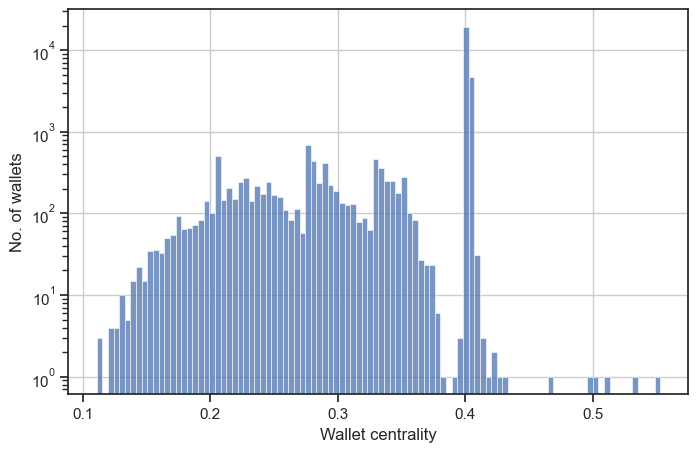

In [6]:
WC_KIND = 'THETA'
df = pd.read_csv(F'WalletCentrality/wc_{WC_KIND}.csv').drop('Unnamed: 0',axis=1)
df['Wallet Centrality']=round(df['Wallet Centrality'],3)

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(df, x='Wallet Centrality', alpha=.75,bins=100)


ax.set_xlabel('Wallet centrality',**{'fontsize': 12})
ax.set_ylabel('No. of wallets',**{'fontsize': 12})
ax.set_yscale('log')
plt.grid()
plt.show()

#fig.savefig(F'imgs/Grafici/histogram_{WC_KIND}.pdf', dpi=100, bbox_inches='tight')